<a href="https://colab.research.google.com/github/bchan9ASU/MAT421/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction to the Problem
Loan approval is a critical process in banking sectors where applicants are either approved or denied a loan.
Financial institutions need to minimize the risk of lending to individuals who are likely to default, as it can have major economic consequences.
Traditionally, banks used credit scores, past repayment histories, and manual assessments to make decisions.
With the advent of machine learning (ML), data-driven models can assist or even outperform traditional methods in identifying potential risks.
This project focuses on using historical loan applicant data to predict whether an applicant is a risky loan recipient.
By accurately predicting risk, lenders can make better, faster decisions and reduce financial losses.

**Research Question:**  
This study investigates whether machine learning models, specifically Logistic Regression, Random Forest, and Gradient Boosting, can accurately predict the financial risk of loan applicants based on demographic and financial profile features.

# 2. Related Work
Loan approval prediction has been a significant area of research in machine learning and data science. Various models have been employed to assess credit risk and predict loan approvals. Logistic Regression, Decision Trees, Random Forests, Support Vector Machines (SVM), and Neural Networks are among the commonly used algorithms in this domain.

Prior studies, such as Addo et al. (2018), have compared machine learning models like Random Forests, Gradient Boosting, and Logistic Regression for credit risk prediction, finding that tree-based models tend to outperform simpler linear models [1]. Ensemble methods like Random Forests often handle complex, non-linear relationships and reduce overfitting, making them highly effective for credit risk modeling.

Additionally, techniques such as K-Nearest Neighbors (KNN) and SVM have been utilized to capture intricate patterns in applicant data. Feature engineering and selection play a crucial role in enhancing model performance. Incorporating domain knowledge to select relevant features and applying dimensionality reduction techniques can lead to more accurate predictions. Moreover, handling class imbalance through resampling methods or using evaluation metrics like the F1-score is essential for building robust models.

In this study, Logistic Regression is employed as an initial baseline model due to its simplicity and interpretability, and ensemble models such as Random Forest and Gradient Boosting are subsequently explored to achieve potentially higher predictive accuracy.

# 3. Proposed Methodology

## 3.1 Data Source
The dataset utilized in this study is sourced from Kaggle: Loan Approval Dataset by rohit265. It comprises 252,000 entries, providing a comprehensive overview of loan applicants' profiles, enabling analysis and modeling for risk assessment.

## 3.2 Data Preprocessing
To prepare the data for modeling:

### 3.2.1 Handling Missing Values
Categorical variables with missing values were imputed using the mode, while numerical variables were filled with the median to maintain data integrity.

### 3.2.2 Encoding Categorical Variables
Label Encoding was applied to convert categorical variables into numerical format, facilitating their use in machine learning algorithms.

### 3.2.3 Feature Selection
Irrelevant features, such as unique identifiers, were removed to focus on variables that contribute to the prediction task.

## 3.3 Model Selection
Three models were selected for evaluation in this study:

- Logistic Regression was chosen as a simple and interpretable baseline model for binary classification tasks such as loan approval prediction. The model’s parameters were set with a maximum of 1000 iterations to ensure convergence.

- Random Forest was employed as an ensemble method capable of capturing complex feature interactions and reducing overfitting, which is often observed in credit risk modeling.

- Gradient Boosting was included to evaluate the effectiveness of boosting techniques, which iteratively correct the errors of weak learners to build a strong predictive model.

## 3.4 Model Evaluation
The dataset was split into training and testing sets using an 80-20 split. Each model's performance was evaluated using metrics such as accuracy, precision, recall, and the F1-score to provide a compreensive assessment of predictive effectiveness.
ssessment.

# 4. Experiment Setup

## Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

## Load Dataset

In [ ]:
df = pd.read_json("loan_approval_dataset.json")

## Preview Dataset

In [ ]:
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

            Profession                 CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
1   Software_Developer             Parbhani     Maharashtra                9   
2     Technical_writer            Alappuzha          Kerala                4   
3   Software_Developer          Bhubaneswar          Odisha                2   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu                3   

   CURREN

## Check for missing values

In [ ]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64


## Handle Missing Values

In [ ]:
# Simple strategy: Fill categorical with mode, numerical with median (if needed)
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            df[column].fillna(df[column].median(), inplace=True)

## Drop Id (not useful for prediction)

In [ ]:
df.drop('Id', axis=1, inplace=True)

## Encode Categorical Variables

In [ ]:
encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = encoder.fit_transform(df[column])

## Feature Selection

In [ ]:
X = df.drop('Risk_Flag', axis=1)
y = df['Risk_Flag']

## Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Logistic Regression Model

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# 5. Expected Results

## Make Predictions

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
## Evaluate Model

In [ ]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8759325396825397

Confusion Matrix:
[[44147     0]
 [ 6253     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     44147
           1       0.00      0.00      0.00      6253

    accuracy                           0.88     50400
   macro avg       0.44      0.50      0.47     50400
weighted avg       0.77      0.88      0.82     50400



C:\Users\chanb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chanb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chanb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Plot Confusion Matrix

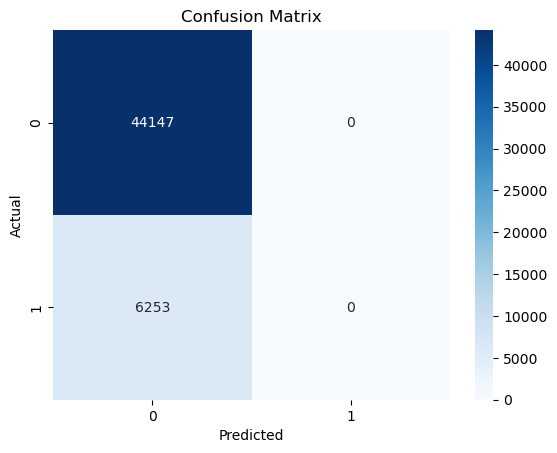

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Train and Evaluate Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8984920634920635

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     44147
           1       0.60      0.54      0.57      6253

    accuracy                           0.90     50400
   macro avg       0.77      0.74      0.75     50400
weighted avg       0.89      0.90      0.90     50400



In [ ]:
# Train and Evaluate Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Evaluate
print("\nGradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.8761309523809524

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     44147
           1       0.78      0.00      0.00      6253

    accuracy                           0.88     50400
   macro avg       0.83      0.50      0.47     50400
weighted avg       0.86      0.88      0.82     50400



In [ ]:
# Compare Accuracy
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_gb)
]

# Create a simple table
import pandas as pd

comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

print("\nModel Comparison Table:")
display(comparison_df)



Model Comparison Table:


,Model,Accuracy
0,Logistic Regression,0.875933
1,Random Forest,0.898492
2,Gradient Boosting,0.876131


## Comparison

While Logistic Regression provided a solid baseline performance, ensemble models such as Random Forests and Gradient Boosting Machines could offer improved predictive accuracy. Prior research, such as Addo et al. (2018), demonstrated that tree-based models generally outperform simpler linear models like Logistic Regression in credit risk prediction tasks [1]. These models are better at capturing complex feature interactions and handling class imbalance, which may lead to enhanced performance in future work. Incorporating such models could be a key avenue for extending this stud.
.


## Conclusion

This study explored the application of multiple machine learning models—Logistic Regression, Random Forest, and Gradient Boosting—for predicting the financial risk associated with loan applicants. Starting with Logistic Regression as a baseline due to its simplicity and interpretability, the project expanded to include ensemble models to evaluate potential performance improvements.

Among the models tested, Random Forest achieved the highest accuracy at approximately 89.85%, outperforming both Logistic Regression and Gradient Boosting. This result aligns with findings in previous research, where ensemble methods such as Random Forests demonstrated superior performance in credit risk assessment tasks. Gradient Boosting showed comparable but slightly lower performance, reinforcing the importance of model selection based on dataset characteristics.

Overall, the results highlight the effectiveness of machine learning in automating loan risk prediction, with ensemble models offering significant gains over simpler linear classifiers. Future work could focus on addressing class imbalance through advanced resampling techniques, fine-tuning hyperparameters, and exploring more complex models such as XGBoost, LightGBM, or deep neural networks to capture more intricate patterns in the data.



## References

[1] Addo, P. M., Guegan, D., & Hassani, B. (2018). Credit Risk Analysis Using Machine and Deep Learning Models. *Risks*, 6(2), 38. https://doi.org/10.3390/risks6020038

[2] Rohit265, "Loan Approval Dataset," Kaggle. Available at: https://www.kaggle.com/datasets/rohit265/loan-approval-datset

